In [1]:
from FPG import treeNode,createTree,updateTree,updateHeadertable,ascend_along_tree,findPrefixPath,miningTree
import matplotlib.pyplot as plt
import seaborn as sns

## Running on IBM datasets

In [2]:
import pandas as pd
IBM_item=[]
ibm=pd.DataFrame({'transaction_id':[],'item_id':[]})
with open('./IBM-Quest-Data-Generator.exe/output.csv','r') as f:
    for line in f.readlines():
        IBM_item.append(line.strip().split()[2])
        ibm=ibm.append({'transaction_id':line.strip().split()[1],'item_id':line.strip().split()[2]},ignore_index=True)

ti_=ibm.groupby(ibm.transaction_id)
IBM_transDB={}
for i in ti_:
    if frozenset(list(i[1]['item_id'])) in IBM_transDB:
        IBM_transDB[frozenset(list(i[1]['item_id']))]+=1
    else:
        IBM_transDB[frozenset(list(i[1]['item_id']))]=1

In [3]:
minsup=[0.02,0.05,0.1,0.2]
import time
IfreqItems=[[],[],[],[]]
Itime=[]
for s in range(len(minsup)):
    t=time.time()
    FPtree,HeadTab=createTree(IBM_transDB,int(minsup[s]*828))
    miningTree(FPtree,HeadTab,int(minsup[s]*828),set([]),IfreqItems[s])
    print(s,time.time()-t)
    Itime.append(time.time()-t)

0 0.026829242706298828
1 0.008389949798583984
2 0.005455970764160156
3 0.001932382583618164


In [4]:
for i in range(len(minsup)):
    print('====min support: ',minsup[i],'====')
    print('size of all frequent itemsets: ',len(IfreqItems[i]))

====min support:  0.02 ====
size of all frequent itemsets:  580
====min support:  0.05 ====
size of all frequent itemsets:  169
====min support:  0.1 ====
size of all frequent itemsets:  112
====min support:  0.2 ====
size of all frequent itemsets:  65


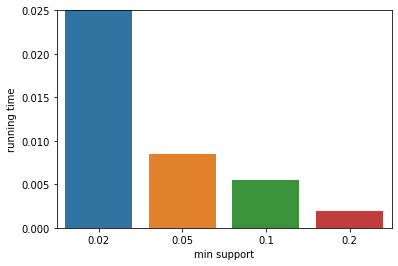

In [5]:
I_time={'minsup':minsup,'time':Itime}

sns.barplot()
plt.ylim(0,0.025)
sns.barplot(x='minsup',y='time',data=I_time)
plt.xlabel('min support')
plt.ylabel('running time')
plt.show()

## Running on kaggle datasets

In [6]:
kg=pd.read_csv('./supermarket/GroceryStoreDataSet.csv',header=None,names=['trans'])
KG_transDB={}
for line in kg.trans:
    if frozenset(line.split(',')) in KG_transDB:
        KG_transDB[frozenset(line.split(','))]+=1
    else:
        KG_transDB[frozenset(line.split(','))]=1

In [7]:
min_sup=[0.05,0.1,0.2]

KfreqItems=[[],[],[],[]]
Ktime=[]
for s in range(len(min_sup)):
    t=time.time()
    FPtree,HeadTab=createTree(KG_transDB,int(min_sup[s]*20))
    miningTree(FPtree,HeadTab,int(min_sup[s]*20),set([]),KfreqItems[s])
    print(s,time.time()-t)
    Ktime.append(time.time()-t)

0 0.0031027793884277344
1 0.001976490020751953
2 0.0012912750244140625


In [8]:
for i in range(len(min_sup)):
    print('====min support: ',min_sup[i],'====')
    print('size of all frequent itemsets: ',len(KfreqItems[i]))

====min support:  0.05 ====
size of all frequent itemsets:  83
====min support:  0.1 ====
size of all frequent itemsets:  46
====min support:  0.2 ====
size of all frequent itemsets:  16


Text(0, 0.5, 'running time')

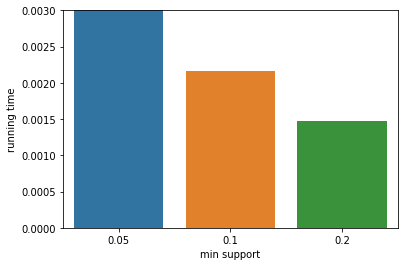

In [9]:
K_time={'minsup':min_sup,'time':Ktime}
K_time

sns.barplot()
plt.ylim(0,0.003)
sns.barplot(x='minsup',y='time',data=K_time)
plt.xlabel('min support')
plt.ylabel('running time')